# Image Transformations
This tutorial shows how to apply common spatial transformations to Images in Julia language.

- toc: true 
- badges: true
- hide_binder_badge: true
- hide_deepnote_badge: true
- hide_colab_badge: true
- comments: true
- categories: [jupyter, julia, spatial-transformations, cropping, scaling, rotation, translation]
- author: Omer

## Activating Project 
As always, we will activate an environment for this small project. We will follow below steps
- Verify if we are in correct folder
- Activate current environment
- See what packages are installed and if need be install more packages. 


In [20]:
@show basename(pwd())

using Pkg
Pkg.activate(".")

@show keys(Pkg.project().dependencies)

basename(pwd()) = "ImageProcessing"
keys((Pkg.project()).dependencies) = ["Images", "GLMakie", "TestImages", "VideoIO"]


  Activating project at `~/website/Julia_Projects/ImageProcessing`


KeySet for a Dict{String, Base.UUID} with 4 entries. Keys:
  "Images"
  "GLMakie"
  "TestImages"
  "VideoIO"

Let's add a `OffsetArrays` package we shall later use for padded view. 

In [42]:
Pkg.add("OffsetArrays")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/website/Julia_Projects/ImageProcessing/Project.toml`
  [6fe1bfb0] + OffsetArrays v1.12.1
    Updating `~/website/Julia_Projects/ImageProcessing/Manifest.toml`
  [6fe1bfb0] ↑ OffsetArrays v1.11.0 ⇒ v1.12.1


As all the required packages are installed, let's move on to applying spatial transformations to images. 
- Cropping 
- Scaling 
- Rotation 
- Translation

Let's import required libraries and load a test image `lighthouse`

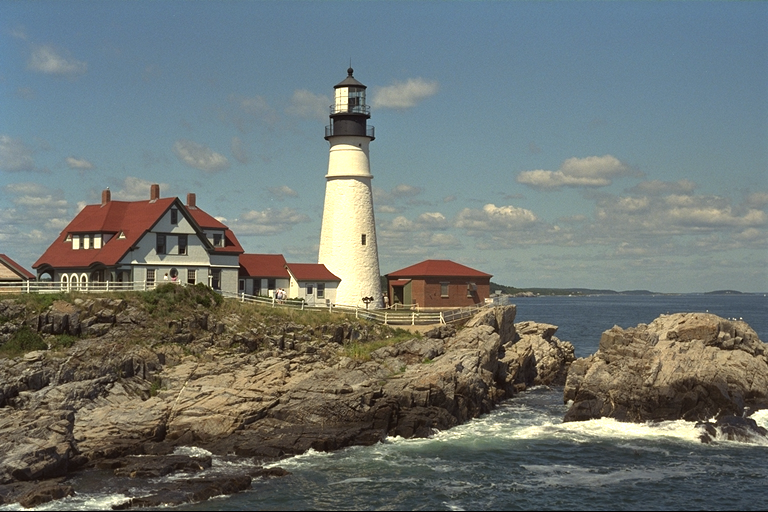

In [43]:
using Images, TestImages, OffsetArrays
img = testimage("lighthouse.png")

Size of image:

In [86]:
img_sz = size(img)

(512, 768)

## Cropping of Image:
Images are treated as matrices. By providing indices, we can extract or display portion of the image. 

Let's consider a problem of cropping the light house from above picture. To do so, we need to provide correct indices range in image coordinate system

> Important: In image coordinate system, origin is top-left corner.

To provide a range in rows and column we use following notation

`rows[start index : stop index, start index : stop index]`

The `:` sign is showing the continuity, so for example `10:15` mean index value `10,11,12,13,14,15`

To extract the light house from above image, we provide the $y$/height (`50:320`) and $x$/width (`300:400`) coordinates

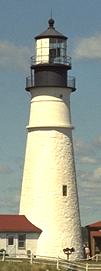

In [23]:
img[50:320,300:400] # cropping lighthouse image

One can also save cropped image.

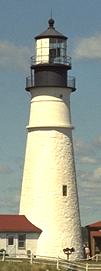

In [85]:
img_crpd = img[50:320,300:400]

Size of cropped image is different than size of original/source image

In [84]:
println("Size of Cropped Image: $(size(img_crpd))")
println("Size of Original Image: $(size(img))")

> Tip: `$` sign in string parses integer output to sting output

We can also have preserve the size of cropped image same as original image by using `PaddedView` function

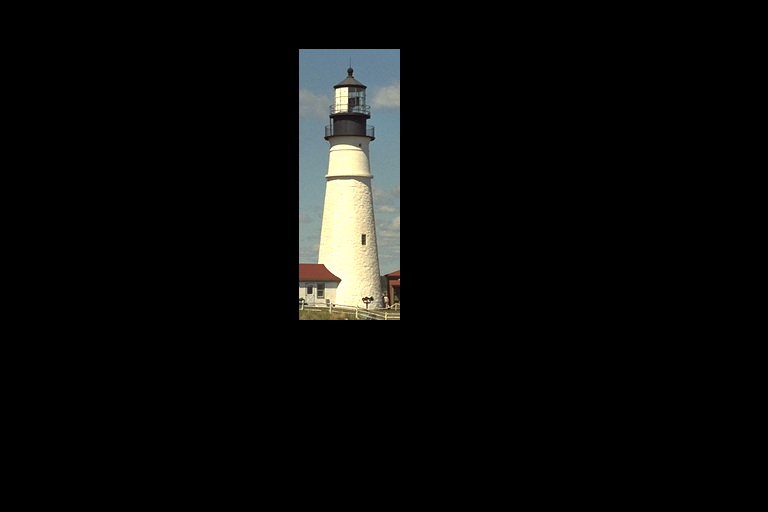

In [111]:
img_pv = PaddedView(
                    zero(eltype(img)),
                    OffsetArray(img_crpd, OffsetArrays.Origin(50,300)),
                    axes(img))

> Tip: `mosaicview()` function provides convenient way to see multiple images in same line (row or column)

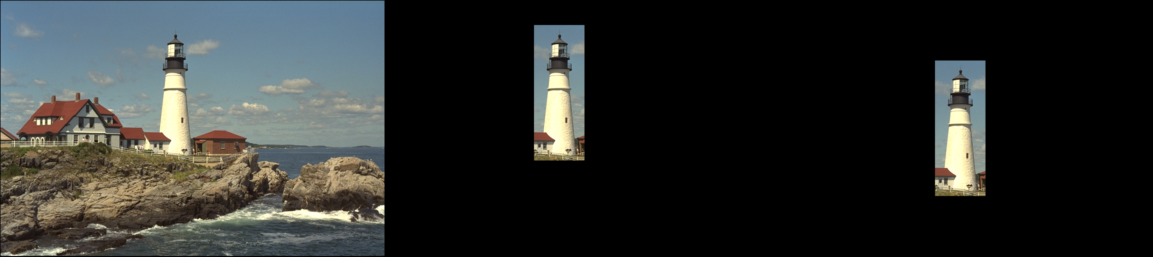

In [112]:
mosaicview(img, img_pv, img_crpd, nrow=1)

`PaddedView()` functions takes three arguments `fillvalue`, `data` , and `padded_axes`

Following table gives mapping of what function expects and what user/programmer has supplied. 

| Function argument | User/Programmer supplied argument |
| --- | --- |
| fillvalue | zero(eltype(img)) |
| data | OffsetArray(img_crpd, OffsetArrays.Origin(50,300)) |
| padded_axes | axes(img) |

Let's decipher these arguments
- `zero(eltype(img))` $\rightarrow$ creates a matrix of zero with element type (`eltype`) same as image element/pixel type
- `OffsetArray(img_crpd, OffsetArrays.Origin(50,300))` $\rightarrow$ creates an offset matrix with cropped data offset by `50` pixels in row and `300` pixels in column
- `axes(img)` $\rightarrow$ Apply padding to image axes (Base.OneTo(512), Base.OneTo(768))

As seen below, both original and padded image are of same size, while cropped image is of smaller size. 

In [101]:
println("Size of Original Image: $(size(img))")
println("Size of Padded_View Image: $(size(img_pv))")
println("Size of Cropped Image: $(size(img_crpd))")

In [103]:
size(img), size(img_pv), size(img_crpd)

((512, 768), (512, 768), (271, 101))

## Scaling image

We can also scale/resize image easily using `resize()` function. We simply supply scale ratio value.
- A ratio value of 0.5 means half of the original size (`512 x 0.5`, `768 x 0.5`)
- A ratio value of 2 means double of the original size (`512 x 2`, `768 x 2`)

In [113]:
img_rs = imresize(img, ratio = 0.5)

size(img), size(img_rs) 

((512, 768), (256, 384))

In [107]:
img_rs = imresize(img, ratio = 2)

size(img), size(img_rs)

((512, 768), (1024, 1536))

One can also scale using percentage or specific dimension;
- Scaling using percentage:

In [123]:
scale_prct = 0.6
sz_new = trunc.(Int, size(img) .* scale_prct)
img_rs = imresize(img, sz_new)

size(img), size(img_rs), sz_new

((512, 768), (307, 460), (307, 460))

> Note: `.` indicates element-wise operation for `trunc()` function and `*` operator

- Scaling using specific dimension

In [125]:
wdth_new = 460

scale_prct = wdth_new / size(img,2)
sz_new = trunc.(Int, size(img) .* scale_prct)
img_rs = imresize(img, sz_new)

size(img), size(img_rs), sz_new, scale_prct

((512, 768), (306, 460), (306, 460), 0.5989583333333334)

> Note: In above examples, I am using last lines to print useful information for diagnostic purposes (e.g., size of original and rescaled image etc., ). In practice, it is useful to see numbers for verification of the applied operation. 

### Rotation of image

We can also rotate image 

- 90 $\text{\textdegree}$ anti-clockwise rotation:       $-\pi$/2
- 45 $\text{\textdegree}$ anti-clockwise rotation:       $-\pi$/4
- 90 $\text{\textdegree}$ clockwise rotation:            $\pi$/2
- 45 $\text{\textdegree}$ clockwise rotation:            $\pi$/4


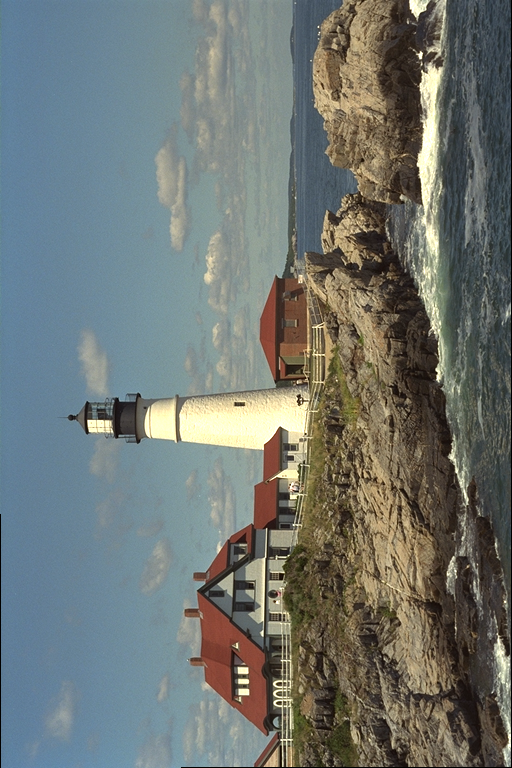

In [114]:
imrotate(img,-π/2)

> Tip: In julia `\pi` + `tab` translates to $\pi$

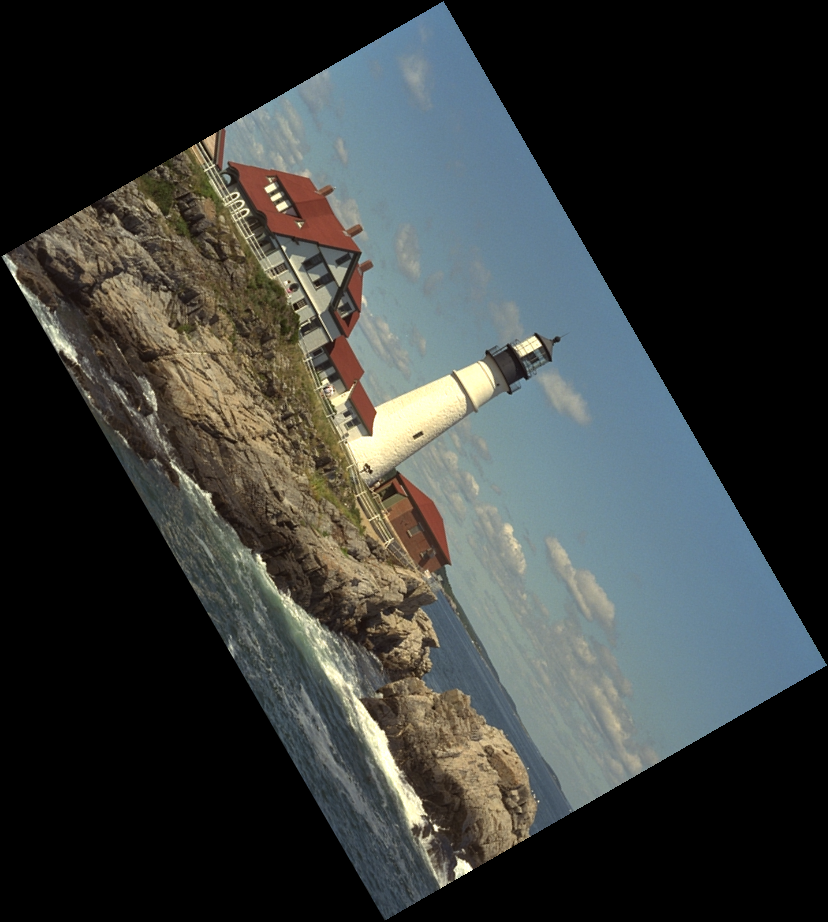

In [116]:
img_rot = imrotate(img,π/3)

In [117]:
size(img), size(img_rot) 

((512, 768), (922, 828))

As seen above, rotated image is of different size. Padding is automatically applied appropriately to compensate for small rotations. 

## Translation of Image

For this we again take help from our `PaddedView()` function

- Translation of 200 pixels in y-direction (rows)

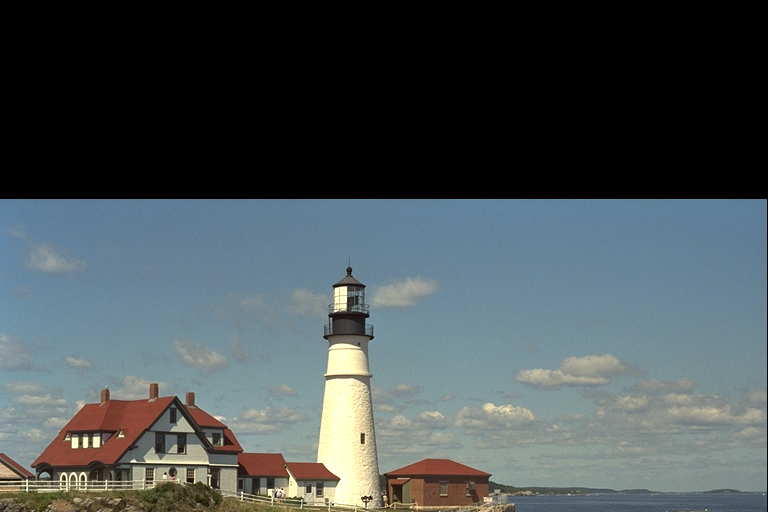

In [131]:
img_trns = PaddedView(
                    zero(eltype(img)),
                    OffsetArray(img, OffsetArrays.Origin(200,0)),
                    axes(img))

As seen below size of both original and translated image is same.

In [130]:
size(img), size(img_trns)

((512, 768), (512, 768))

- Translation of 350 pixels in x-direction (columns)

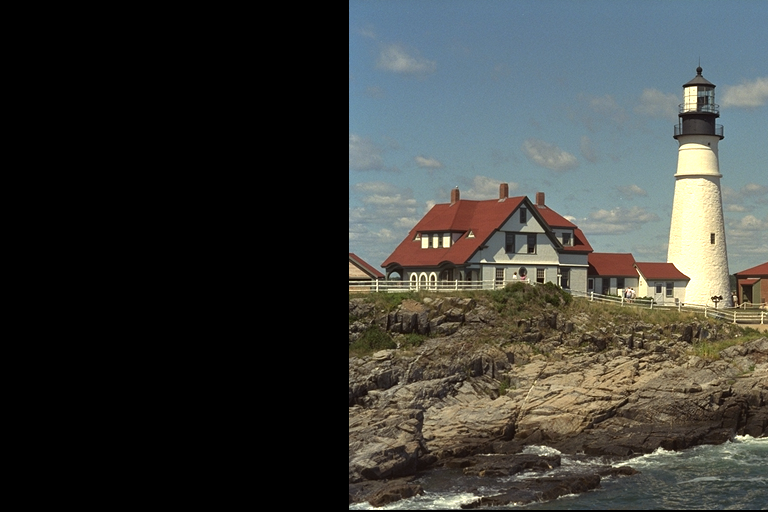

In [134]:
img_trns = PaddedView(
                    zero(eltype(img)),
                    OffsetArray(img, OffsetArrays.Origin(0,350)),
                    axes(img))

- Translation in both x and y direction

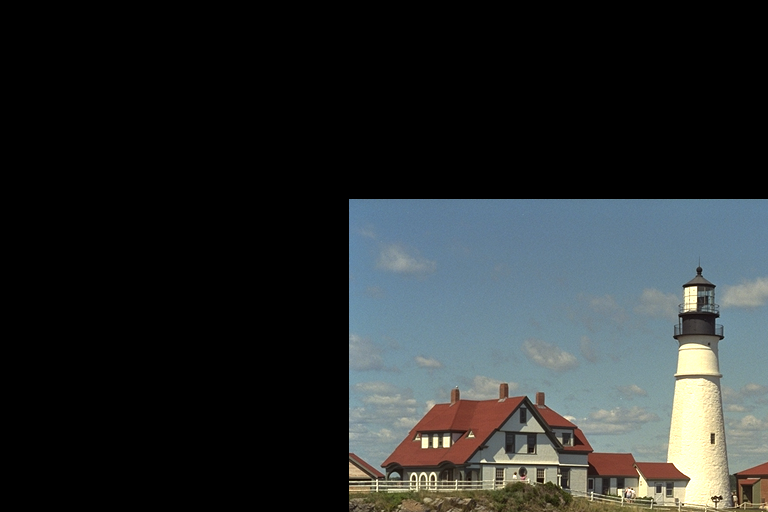

In [136]:
img_trns = PaddedView(
                    zero(eltype(img)),
                    OffsetArray(img, OffsetArrays.Origin(200,350)),
                    axes(img))

Again size is same...

In [138]:
size(img), size(img_trns)

((512, 768), (512, 768))

Great! This concludes the tutorial on applying spatial transformation on Image. See you next time...

In [139]:
VERSION

v"1.7.2"